In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

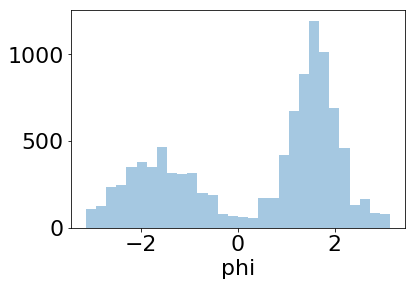

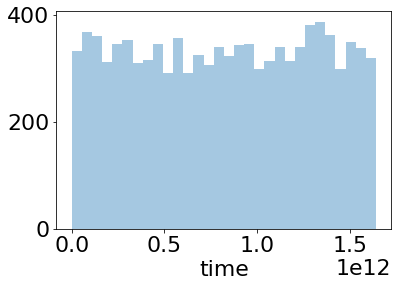

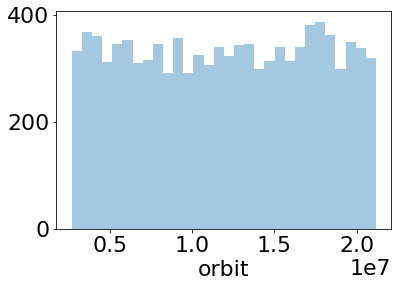

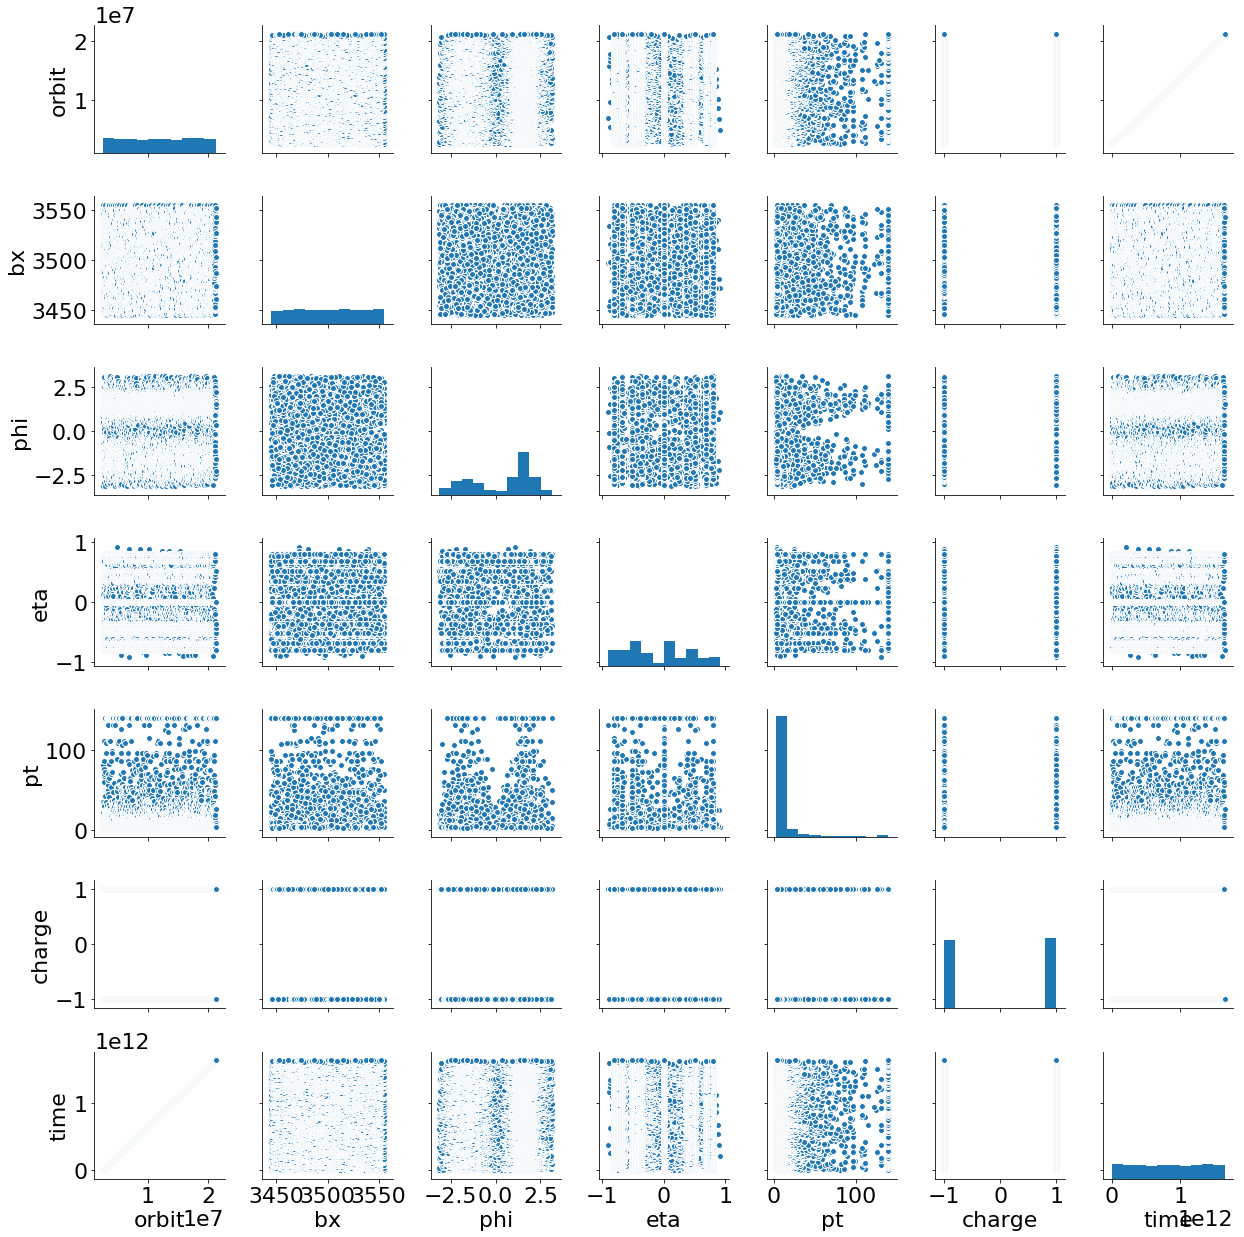

In [13]:
df=pd.read_csv('scout_326790_000000_trunc.csv')
df['time']=(df['orbit']-df['orbit'][0])*88924.5+(df['bx']-df['bx'][0])*24.95
df1=df.shift(1)
df.head()
sns.distplot(df['phi'], kde=False, bins=30)
plt.show()
sns.distplot(df['time'], kde=False,  bins=30)
plt.show()
sns.distplot(df['orbit'],kde=False, bins=30)
plt.show()
sns.pairplot(df)
plt.show()

In [315]:
# How many time/orbit slices have a certain number of muons
bins=int(0.003*len(df)) #If 30 bins are good for 10000 data then int(0.003*len(df)) bins are good for len(df) data.
muons=np.zeros(bins)
sclice=np.array([df['orbit'].min()+ ((df['orbit'].max()-df['orbit'].min())/bins)*i for i in range(bins+1)])
for orbit in df['orbit']:
    for i in range(bins):
        if(orbit > sclice[i] and orbit < sclice[i+1]):
            muons[i]+=1

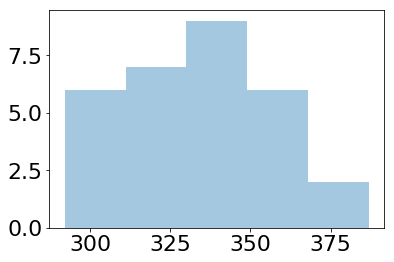

In [316]:
sns.distplot(muons, kde=False)# How many time/orbit slices have a certain number of muons (PLOT)

Text(0,0.5,'# muon candidates')

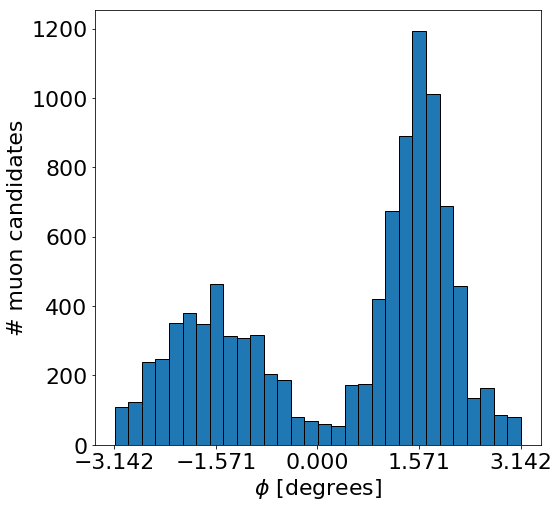

In [318]:
# [clean up all the lines below, or a make a new file with cleaned code, once you read my comments]
# what are the horizontal and vertical axes representing in the plot above ? 
# for example first been is  at x = 300 and y = 6, what does this mean ?
# 
# always beautify the plots, thinking an old person who knows nothing for LHC/orbits/CMS 
# what we need is an *easily* interpretable quantity to be summarized in a diagram 
# e.g., how many muons we record per unit of time in the detector
# put labels and ticks in the plots, see example with a phi distribution
phiticks = [0.5*np.pi*i for i in range(-2,3)] # people know pi=3.14, it immediately implies an angle
plt.rc('font', size=22)
plt.figure(figsize=(8,8)) # square plots are convinient for journals and powerpoint presentations
plt.hist(df['phi'], bins = 30, histtype = 'bar', ec='black')
plt.xticks(phiticks)
plt.xlabel('$\phi$ [degrees]') # latex can be entered in the label's string
plt.ylabel('# muon candidates')

bxMin = 3445 
bxMax = 3555
timePerOrbit 2744.5 ns 
orbitsPerTimeUnit = 72873.019


Text(0,0.5,'orbit')

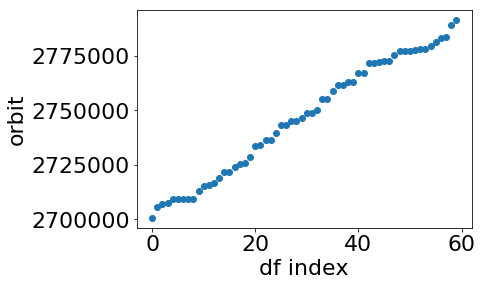

In [266]:
# bunch clock frequency = 40.07897 MHz 
# orbit clock frequency = 11.2455 kHz
# 1 orbit contains 3564 BX's (more accuretly, 3564 bunch places since not all bunches collide)
# more info: https://edms.cern.ch/file/445762/3/Vol3_Chap2_v4.pdf
nBXperOrbit = 3564 

# only BX's from the LHC abort gap are dumped in the CSV
bxMin, bxMax = df['bx'].min(), df['bx'].max()
print('bxMin = %d \nbxMax = %d'%(bxMin, bxMax))
# BX's within [bxMin, bxMax] = time period within the LHC abort gap of each orbit
# each line in CSV has a unique pair of (orbit, bx) which defines its timestamp
# no line will be appended in CSV, if and only if no muon candidates were recorded (=empty) 
# or if the scouting system was not running in those [problem]
# BX's <=bxMin OR >= bxMax are intentionally not appended in the CSV in order to avoid collisions

# for each orbit, we dump in the CSV 110 BX's (= bxMax - bxMin) that 'sit' in the LHC abort gap (end of the train)
# that is, each orbit in the CSV corresponds to 110*24.95 ns of active recorded time, due to our selection made 
# (we dump in CSV only a part of each orbit during the LHC abort gap)
timePerOrbit = 110*24.95
print('timePerOrbit %2.1f ns '%timePerOrbit)

timeUnit = 0.2*1e9 # desired time unit in seconds
orbitsPerTimeUnit = timeUnit/timePerOrbit
print('orbitsPerTimeUnit = %2.3f'%orbitsPerTimeUnit)

plt.scatter(range(60), df[0:60]['orbit']) # large vertical jumps here, will indicate failure of the scouting system and we have to care of this 
plt.xlabel('df index')
plt.ylabel('orbit')

orbitMin 2700706 orbitMax 21174063
nOrbits 18473357 
total recording time 50700128286.5000 ns (~= 50.7 s)
first 10 entries of the counting expirement: [47. 30. 42. 41. 29. 53. 51. 28. 44. 40.]
counts in the first 10 bins of the histogram: [ 1.  7.  7. 18. 30. 28. 37. 39. 35. 22.]
edges of the first 10 bins of the histogram: 
 [17.         20.28571429 23.57142857 26.85714286 30.14285714 33.42857143
 36.71428571 40.         43.28571429 46.57142857 49.85714286]


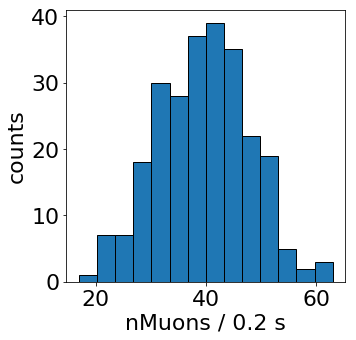

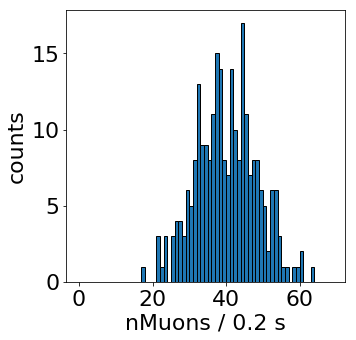

bin_edges  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
counts  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  3.  1.  3.  0.  3.  4.  4.  3.  6.  5.  8. 13.  9.  9.  8.
 11. 15. 14.  8.  7. 14. 10.  8. 17. 11.  7.  8.  8.  6.  5.  2.  6.  6.
  3.  1.  1.  0.  1.  1.  2.  0.  0.  1.  0.  0.  0.  0.  0.]
integral = 253.0000 
totMuons = 10000.0000 which corresponds to the total nMuons the CSV file has
df.shape =  (10000, 7)


In [322]:
orbitMin  = df['orbit'][:1].values[0]
orbitMax  = df['orbit'][-1:].values[0] 
rectime   = (orbitMax-orbitMin)*timePerOrbit # in ns
print('orbitMin %d orbitMax %d'%(orbitMin, orbitMax))
print('nOrbits %d '%(orbitMax - orbitMin))
print('total recording time %2.4f ns (~= %2.1f s)' %(rectime, rectime*1.e-9))

bins=int((orbitMax-orbitMin)/orbitsPerTimeUnit) 
muons=np.zeros(bins)
sclice=np.array([df['orbit'].min()+ ((df['orbit'].max()-df['orbit'].min())/bins)*i for i in range(bins+1)])
for orbit in df['orbit']:
    for i in range(bins):
        if(orbit >= sclice[i] and orbit < sclice[i+1]): # note the >=, the = is needed to capture first orbit
            muons[i]+=1
        if(orbit == orbitMax and orbit == sclice[i+1]): # note the ==, is needed to capture last orbit
                                                        # last bin is [leftedge,rightedge] and not [leftedge,rightedge)
                muons[i]+=1
# see bins: in https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html
# and https://en.wikipedia.org/wiki/Histogram for general discussion on histograms

print('first 10 entries of the counting expirement:', muons[0:10]) # (think about it)
plt.figure(figsize=(5,5))
hist, bins, patches = plt.hist(muons, bins= 'auto', histtype = 'bar', ec='black')
plt.xlabel('nMuons / %2.1f s'%(timePerBin*1.e-9)) 
plt.ylabel('counts')
print('counts in the first 10 bins of the histogram:', hist[0:10])
print('edges of the first 10 bins of the histogram: \n', bins[0:11])
# still, the auto-binned plot is difficult to interpret since by construction nMuons is an integer 
# is not nice to have binEdges of 20.28571429 23.57142857 for the nMuons observable

# make manually a histogram with our own desired (integer) binning 
# first bin includes all counts with nMuons in [0,1), 
# 6th bin all counts with nMuons in [5,6) = 5 if nMuons is integer-valued
maxBins = 70
plt.figure(figsize=(5,5))
binCounts, bin_edges, patches = plt.hist(muons, bins= [i for i in range(maxBins)], histtype = 'bar', ec='black', density = False)
plt.xlabel('nMuons / %2.1f s'%(timePerBin*1.e-9)) # latex can be entered in the label's string
plt.ylabel('counts')
plt.show()
print('bin_edges ', bin_edges)
print('counts ', binCounts)
integral = 0
totMuons = 0
for i in range(len(binCounts)): 
    binWidth = bin_edges[i+1] - bin_edges[i]
    integral += binCounts[i]*binWidth 
    totMuons += binCounts[i]*bin_edges[i] # the left edge is exactly equal to the nMuons in that bin (integer valued)

print('integral = %2.4f '%(integral))
print('totMuons = %2.4f which corresponds to the total nMuons the CSV file has'%(totMuons))
print('df.shape = ', df.shape)

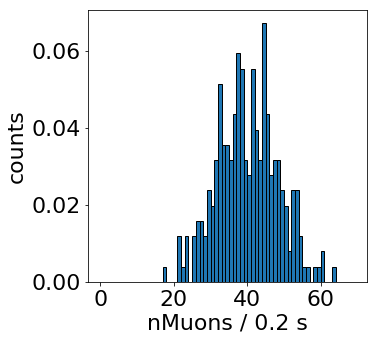

bin_edges  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
probability  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00395257
 0.         0.         0.         0.01185771 0.00395257 0.01185771
 0.         0.01185771 0.01581028 0.01581028 0.01185771 0.02371542
 0.01976285 0.03162055 0.0513834  0.03557312 0.03557312 0.03162055
 0.04347826 0.05928854 0.05533597 0.03162055 0.02766798 0.05533597
 0.03952569 0.03162055 0.06719368 0.04347826 0.02766798 0.03162055
 0.03162055 0.02371542 0.01976285 0.00790514 0.02371542 0.02371542
 0.01185771 0.00395257 0.00395257 0.         0.00395257 0.00395257
 0.00790514 0.         0.         0.00395257 0.         0.
 0.         0.         0.        ]
integral = 1.0

In [323]:
# understanding what density = True does
maxBins = 70
plt.figure(figsize=(5,5))
binCounts, bin_edges, patches = plt.hist(muons, bins= [i for i in range(maxBins)], histtype = 'bar', ec='black', density = True)
plt.xlabel('nMuons / %2.1f s'%(timePerBin*1.e-9)) # latex can be entered in the label's string
plt.ylabel('counts')
plt.show()
print('bin_edges ', bin_edges)
print('probability ', binCounts)
integral = 0
totMuons = 0
for i in range(len(binCounts)): 
    binWidth = bin_edges[i+1] - bin_edges[i]
    integral += binCounts[i]*binWidth 
    totMuons += 253*binCounts[i]*bin_edges[i] # note the 253 and understand why is needed
# read https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html density:  

print('integral = %2.4f '%(integral))
print('totMuons = %2.4f which corresponds to the total nMuons the CSV file has'%(totMuons))
print('df.shape = ', df.shape)
# the very small number you was getting when sns.distplot(muons, kde=True) should be now apparent